In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
#plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

%matplotlib inline

## We'll look into : Path of the sum, probability distributions of last two rolls in stopping after a threshold

### Roll a Dice infinite times. Update the cumulative sum after each roll. What is the probability that evolution of sum will pass through N?

In [38]:
# p(1) = 1/6 = A
# p(2) = 1/6 + 1/6*p(1)
# p(3) = 1/6 + 1/6*p(2) + 1/6*p(1)
# Similarly for large N, p(N) = sum_i=1to6 1/6*p(N-i). 

# the sequence is
1 # A
2 # A + A^2
3 # A + A^2 + A^3
# ...
6 # A + A^2 + .... A^6

# Sum of 1 to 6 is 5*p(6)/2 + p(6) = 7*p(6)/2
7 # then p(7) = 7/12*p(6)
8 # then p(8) = 49/12*p(6) - 1/6

# For large N, the next number is a rolling window average of width 6. 
# Characteristic polynomial is 6x^6-x^5-x^4-x^3-x^2-x-1 = 0, x = 1 is a root
# Sum of roots is 1/6. There is one positive one negative root, rest are complex concugate pairs
# 6x^6-x^5-x^4-x^3-x^2-x-1  = (x -1)( 6x^5 + 5x^4 + 4x^3 + 3x^2 + 2x + 1 )

# Let's calculate this number for any N
mi_dict = { 1: 1/6 }
# even if we memorize, still slower than the iterative method
def p_N( N ):
    if N == 1:
        return 1/6
    pN = 0
    if N < 7:
        pN += 1/6
    for i in range(6):
        if N - (i + 1) >=1:
            pN += mi_dict.get( N-(i+1), p_N( N-(i+1) ) )/6
    mi_dict[ N ] = pN
    #print( mi_dict )
    return pN
p_N( 5 )

0.30877057613168724

In [24]:
# Let's keep the probability of visiting each N in memory 
memory = { 1: 1/6 }
N = 3

def iterative_pN( N ):
    for i in range( 2, N+1 ):
        p = 0
        if i < 7:
            p += 1/6
        for j in range(6):
            if i - ( j + 1) > 0:
                p += memory[ i - ( j +1 ) ]/6
        memory[ i ] = p  
    return memory[ N ] 
res = iterative_pN(50)
print( res )

0.2857143000636835


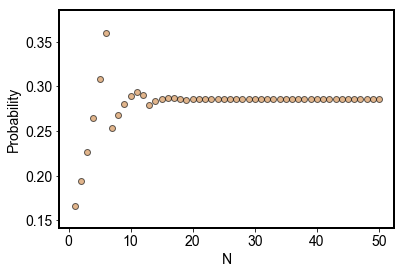

In [68]:
# plot probability of passing through N as a function of N
# large N limit is 2/7
plt.rc( 'font', size = 14 )
plt.scatter( list( memory.keys() ), list( memory.values() ), color = 'peru', alpha = 0.6, edgecolor = 'k' )
plt.ylabel( "Probability" )
plt.xlabel( "N" )

In [12]:
# probability of sum passing through 3
7/36/6+1/6/6+1/6

0.22685185185185183

### Roll a Dice until the sum passes a threshold N. What is the probability distribution for the last roll?

In [22]:
# Let's keep the probability of visiting each N in memory 
memory = { 1: 1/6 }
N = 63

res = iterative_pN(N)

{1: 0.04761904751761173, 2: 0.09523809500007144, 3: 0.14285714265742025, 4: 0.19047619056878365, 5: 0.23809523844786748, 6: 0.28571428580824565}


1.0000000000000002

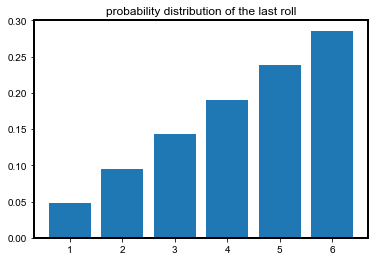

In [15]:
# Once we have probabilities of visiting each N
# We can calculate the probability distribution of last roll going backwards
# We expect 6 to have the highest probability because it gives you the biggest step to cross the threshold 
# i.e more possible
# Indeed in the large threshold limit, we expect p(6) = 6/ (6*7/2) = 2/7
# Using similar reasoning we can also get the steady state probability of the sum's path visiting N:
# For large enough stopping number T, 
# p(last roll = 1) = p(T)*1/6 => p(T) = 6/21 = 2/7 

# keep the probability distribution in a dictionary
mi_dict = { }
for i in range(6):
    mi_dict[ i+1 ] = 0

for i in range(6):
    for j in range(6):
        if N + i - j <= N:
            mi_dict[ j+1 ] += memory[ N + i - j ]*1/6

print( mi_dict )
plt.bar( list( mi_dict.keys() ), list( mi_dict.values() ) )
plt.title( "Probability distribution of the last roll")
sum( list( mi_dict.values() ) )

### Roll a Dice until the sum passes a threshold N. What is the probability distribution for the second from the last roll?

{1: 0.16666666666666669, 2: 0.1666666666666667, 3: 0.1666666666666667, 4: 0.1666666666666667, 5: 0.1666666666666667, 6: 0.1666666666666667}


1.0000000000000002

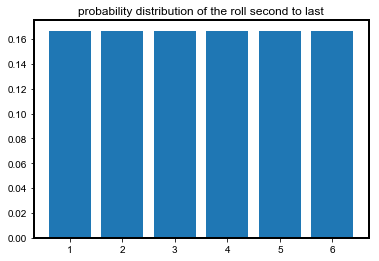

In [21]:
# probability of having sequence (N-j-i, N-j, N ) for the sum given j is
# P(N-j-i)*1/6
# Then probability of rolling i,j in last sequence is P(N-j-i)*P( rolling i )*P( rolling j )

# keep the probability distribution in a dictionary
mi_dict = { }
for i in range(6):
    mi_dict[ i+1 ] = 0
    
for i in range(6):
    for j in range(6):
        if N + i - j <= N:
            for q in range(6):
                mi_dict[ q+1 ] += memory[ N + i - j -q ]*1/6*1/6

print( mi_dict )
plt.bar( list( mi_dict.keys() ), list( mi_dict.values() ) )
plt.title( "probability distribution of the roll second to last" )
sum( list( mi_dict.values() ) )

In [ ]:
# Why is it uniform?

#    Last Sum -One Step Bef
# 1 :   64    -    63
# 2 :   64    -    62
#       63    -    61
# 3 :   65    -    62
#       64    -    61
#       63    -    60
# ...

# but for two steps before, the p(N) already saturated at 2/7 since we are in N-> Inf limit
# therefore the step before last has uniform probability.

### Using numbers in [1,6], generate all paths of reacing sum N

Keep constituents in a dictionary, can calculate number of permutations to get number of different ways

In [2]:
import math

In [43]:
# hold rolled numbers in a dictionary
mi_dict = { }
for i in range(6):
    mi_dict[ i+1 ] = 0
mi_dict[ "Total" ] = sum(mi_dict.values())
mi_dict

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 'Total': 0}

In [3]:
# calculate number of permuations
def N_perm( mi_dict ):
    res = math.factorial( sum( mi_dict.values() ) )
    for i in range(len( mi_dict ) - 1):
        res /= math.factorial( mi_dict[ i + 1 ] )
    return res
N_perm( { 1: 2, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, "Total" : 0 } )

90.0

In [5]:
results = { 0 :  [ mi_dict ]  }

Keep all possible paths in a list

In [47]:
# iterative
# Starting from 0, we can fill up to N
results = { 0 : [ [] ] }
N = 4
for i in range(1, N+1 ):
    if i<7:
        t = results.get( i , [] )
        t.append( [ i ] )
        results[ i ] = t
    #if i != N:
    for j in range(6):
        if i+j+1 <= N:
            for elem in results[ i ]:
                temp2 = elem.copy()
                temp2.append( j + 1 )
                temp3 = results.get( i + j + 1 , [] )
                temp3.append( temp2 )
                results[ i + j + 1 ] = temp3 
results

{0: [[]],
 1: [[1]],
 2: [[1, 1], [2]],
 3: [[1, 2], [1, 1, 1], [2, 1], [3]],
 4: [[1, 3],
  [1, 1, 2],
  [2, 2],
  [1, 2, 1],
  [1, 1, 1, 1],
  [2, 1, 1],
  [3, 1],
  [4]]}

Find a way of getting rid of temps above. Do it recursively:

In [48]:
# recursive
# Complexity :
all_results = {}

def paths_to_N(N):
    if N == 0:
        all_results[ 0 ] = [[]] 
        return [[]]
    paths = []
    for i in range(6):
        if N-i-1>=0:
            pre_paths = all_results.get( N-i-1, paths_to_N( N - (i + 1) ) )
            for path in pre_paths:
                path.append( i+1 )
                paths.append( path )
    all_results[ N ] = paths
    return paths

In [49]:
len(paths_to_N(12))

1936

In [50]:
if( results[ 4 ].sort() == paths_to_N(4).sort() ): print( "Yep" )

Yep


### How many different ways we can add numbers from 1 to 6 to get number N?

In [54]:
# f(N) = Sum_{i=1 to 6}( f(N-i) )
# for f(1) to f(6), there is possibility of direct landing
# To only visit each node once, use a dictionary to store calculated results
# Then we visit each N only once

# recursive
# Complexity : O(N)

all_results = {}
def num_ways_to_add(N):
    if N == 0 :
        all_results[ 0 ] = 0
        return 0
    ways = 0;
    for i in range(6):
        if N-i-1>=0:  
            ways += all_results.get( N-i-1, num_ways_to_add( N-i-1 ) )
    if N < 7:
        ways +=1
    all_results[ N ] = ways 
    return ways

In [55]:
num_ways_to_add(12)

1936

In [56]:
j = 0
l = 6
h = 20
for i in range( l,h ):
    if( len( paths_to_N( i ) ) == num_ways_to_add( i) ):
        j+=1
if j == h-l:
    print( "Yep" )

Yep
